In [9]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/SamsungElectronics/005930.KS.csv')

In [6]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1050 non-null   object 
 1   Open       1050 non-null   float64
 2   High       1050 non-null   float64
 3   Low        1050 non-null   float64
 4   Close      1050 non-null   float64
 5   Adj Close  1050 non-null   float64
 6   Volume     1050 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 57.5+ KB


None

,Open,High,Low,Close,Adj Close,Volume
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1.050000e+03
mean,61728.666667,62281.047619,61154.857143,61695.238095,58735.879940,1.585869e+07
std,12775.475199,12844.320569,12701.364752,12742.437941,13384.598628,8.694917e+06
min,37450.000000,37600.000000,36850.000000,37450.000000,33325.488281,0.000000e+00
25%,51025.000000,51525.000000,50600.000000,51200.000000,46613.445312,1.075082e+07
50%,59900.000000,60400.000000,59450.000000,60000.000000,58035.882812,1.419202e+07
75%,72400.000000,73075.000000,71900.000000,72300.000000,69346.085938,1.898888e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,87219.484375,9.030618e+07


In [101]:
df.Date = pd.to_datetime(df['Date'])

In [102]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,34482.320312,7847664,38750.000000,38750.000000,0.0,NaN
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,33458.964844,12471493,38175.000000,38175.000000,0.0,0.0
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,33325.488281,14108958,37933.333333,37933.333333,0.0,0.0
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,34482.320312,12748997,38137.500000,38137.500000,0.0,0.0
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,33903.898438,12756554,38130.000000,38130.000000,0.0,0.0


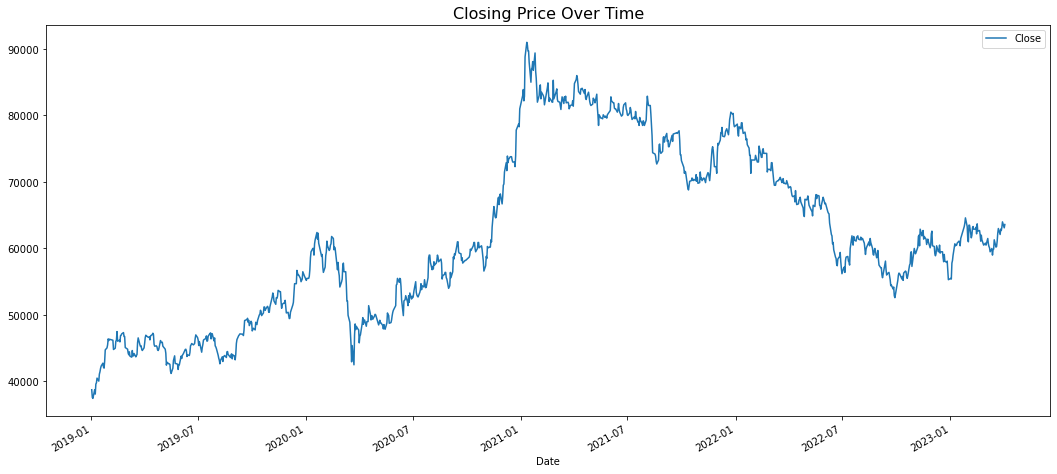

In [103]:
df.plot('Date','Close',figsize=(18,8))
plt.title('Closing Price Over Time', fontsize=16)
plt.show()

Create columns for SMAs
* 20 days
* 50 days

In [19]:
df['20_SMA'] = df['Close'].rolling(window=20, min_periods=1).mean()
df['50_SMA'] = df['Close'].rolling(window=50, min_periods=1).mean()

In [21]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA
1045,2023-03-29,62500.0,62700.0,62200.0,62700.0,62700.0,11216008,60900.0,61720.0
1046,2023-03-30,63700.0,63700.0,63100.0,63200.0,63200.0,15684377,61020.0,61762.0
1047,2023-03-31,64000.0,64000.0,63700.0,64000.0,64000.0,14094479,61195.0,61822.0
1048,2023-04-03,64000.0,64000.0,63000.0,63100.0,63100.0,11973133,61275.0,61876.0
1049,2023-04-04,63400.0,63800.0,62800.0,63600.0,63600.0,11702796,61420.0,61918.0


Moving Average Crossover

In [28]:
df['Signal'] = np.where(df['20_SMA'] > df['50_SMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,34482.320312,7847664,38750.000000,38750.000000,0.0,NaN
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,33458.964844,12471493,38175.000000,38175.000000,0.0,0.0
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,33325.488281,14108958,37933.333333,37933.333333,0.0,0.0
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,34482.320312,12748997,38137.500000,38137.500000,0.0,0.0
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,33903.898438,12756554,38130.000000,38130.000000,0.0,0.0


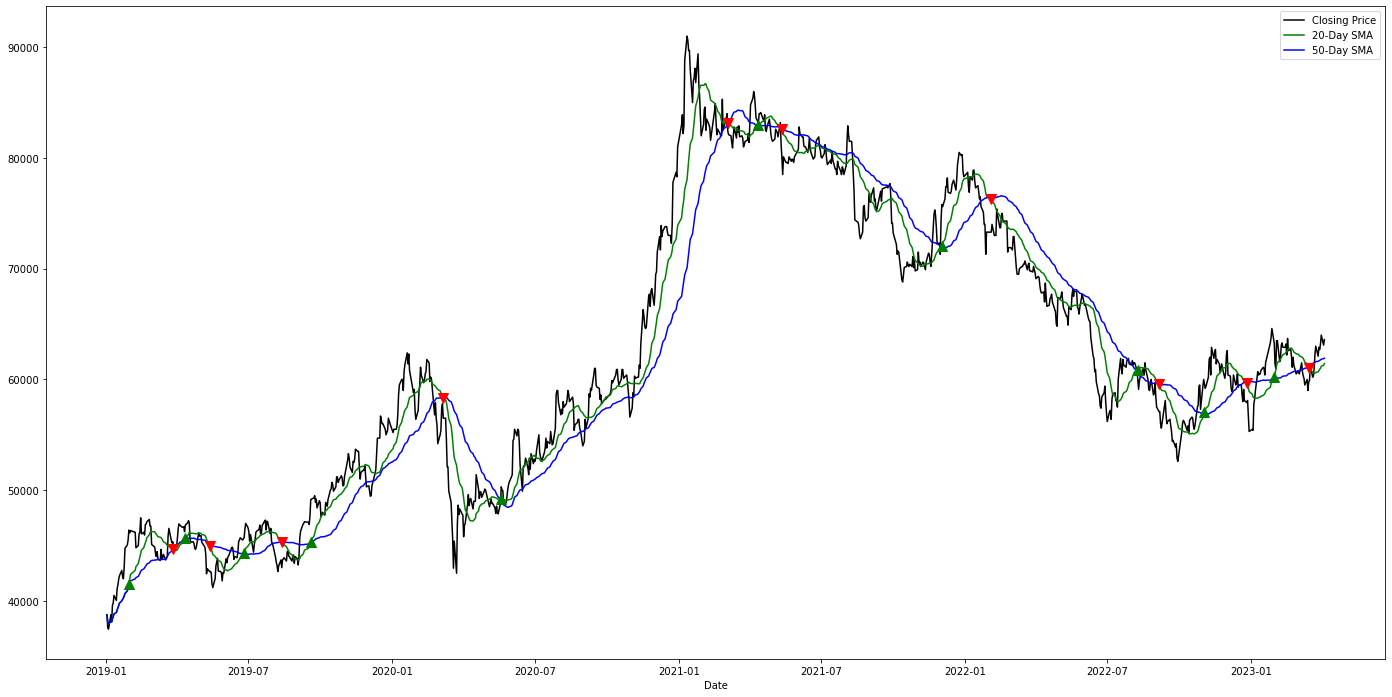

In [105]:
buy_mask = df['Position'] == 1
sell_mask = df['Position'] == -1
plt.figure(figsize=(24,12))
plt.plot(df['Date'], df['Close'], color='black', label='Closing Price')
plt.plot(df['Date'], df['20_SMA'], color='green', label='20-Day SMA')
plt.plot(df['Date'], df['50_SMA'], color='blue', label='50-Day SMA')
plt.plot(df[buy_mask].Date, df['20_SMA'][buy_mask], '^', color='green', markersize=10)
plt.plot(df[sell_mask].Date, df['20_SMA'][sell_mask], 'v', color='red', markersize=10)
plt.legend()
plt.xlabel('Date')
plt.show()

In [115]:
df['20_EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
df['50_EMA'] = df['Close'].ewm(span=50, adjust=False).mean()

df['eSignal'] = np.where(df['20_EMA'] > df['50_EMA'], 1.0, 0.0)
df['ePosition'] = df['eSignal'].diff()

In [117]:
ebuy_mask = df['ePosition'] == 1
esell_mask = df['ePosition'] == -1

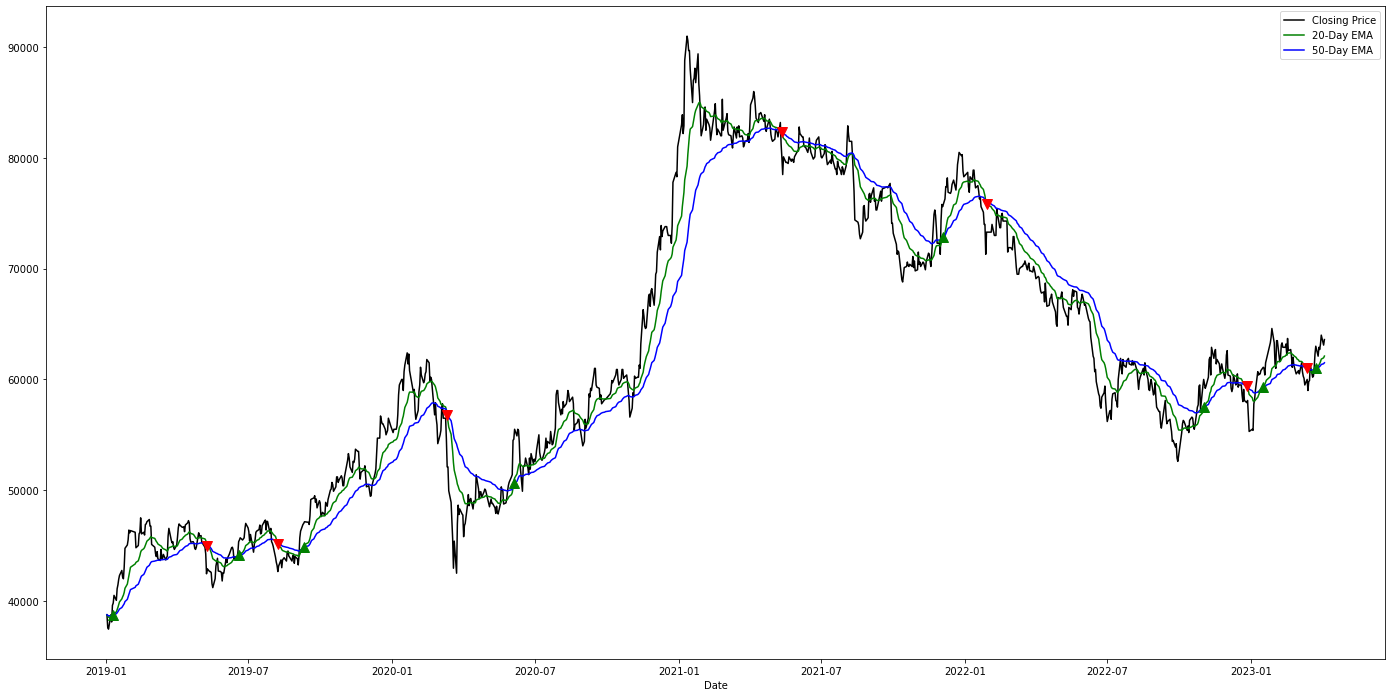

In [120]:
plt.figure(figsize=(24,12))
# Plot Close, 20-Day EMA & 50-Day EMA
plt.plot(df['Date'], df['Close'], color='black', label='Closing Price')
plt.plot(df['Date'], df['20_EMA'], color='green', label='20-Day EMA')
plt.plot(df['Date'], df['50_EMA'], color='blue', label='50-Day EMA')
# Plot Crossovers
plt.plot(df[ebuy_mask].Date, df['20_EMA'][ebuy_mask], '^', color='green', markersize=10)
plt.plot(df[esell_mask].Date, df['20_EMA'][esell_mask], 'v', color='red', markersize=10)
plt.legend()
plt.xlabel('Date')
plt.show()